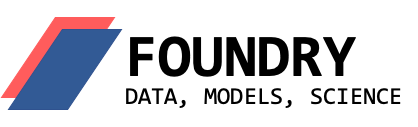

# Publishing datasets to Foundry

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MLMI2-CSSI/foundry/blob/main/examples/publishing-guides/dataset_publishing.ipynb)

This notebook walks through:


1.   Connecting to Globus
2.   Creating metadata
3.   Publishing datasets to Foundry


This code requires Foundry v0.6.0 or higher; if you're running locally, be sure you've updated the `foundry_ml` package.

This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

## Setup

In [5]:
# !pip install foundry_ml --upgrade
# !pip install mdf_connect_client
# !pip install -U mdf_toolbox

  Using cached mdf_toolbox-0.6.0-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: mdf-toolbox
    Found existing installation: mdf-toolbox 0.5.7
    Uninstalling mdf-toolbox-0.5.7:
      Successfully uninstalled mdf-toolbox-0.5.7


### Data format and naming

Currently, Foundry accepts hierarchical data (e.g. HDF5 files) or tabular data (e.g. CSV, Excel, [JSON Lines](https://jsonlines.org/), or standard multiline JSON). For best performance, we recommend using a JSON format.

Future support for file data (e.g. whole images, zipped archives) and other data formats are currently in development.

Datasets and associated metadata should follow the example in our [gitbook](https://ai-materials-and-chemistry.gitbook.io/foundry/v/docs/concepts/foundry-datasets) and the '*metadata*' section of the publishing example below. Filenames should correspond to the 'splits' as specified in the metadata to be accepted by the system. 

Your metadata should be formatted as a Python dict (see example below under *Arguments needed for publishing*). 

### Getting started with Globus

Before publishing, you need join the right Globus groups so that you have the permissions to publish to Foundry! [Join this group](https://app.globus.org/groups/cc192dca-3751-11e8-90c1-0a7c735d220a/about) and [this group](https://app.globus.org/groups/42a7a77c-4789-11ea-95b7-0ef992ed7ca1/about) to get started. Follow the 
prompts to get set up (and set up your Globus account, if you don't already
have one).

If you have a particularly large dataset that cannot be uploaded via HTTPS, see _Uploading via Globus Connect Server_ at the bottom of this notebook.

## Foundry instantiation

We need to pass `no_browser=True` and `no_local_server=True` to the constructor in order for the code to work in Jupyter notebooks or Google Colab

In [6]:
!pip install funcx==1.0.10

In [1]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.0.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 1.10.0
anaconda-project                   0.10.2
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autopep8                           1.6.0
Babel                              2.

In [1]:
from foundry import Foundry

f = Foundry(no_browser=True, no_local_server=True)

You have defined some of the authorizers but not all. DLHub is falling back to login. You must provide authorizers for DLHub, Search, OpenID, FuncX.


## Arguments needed for publishing

This section describes and defines the variables for all of the possible arguments you could pass to `f.publish()`, for illustrative purposes.

You can choose to upload your dataset either via HTTPS or via Globus Connect Client (see _Uploading via Globus Connect Client_ at the end of this notebook). The example below is for HTTPS upload, which requires minimal setup. Globus Connect Client allows you to upload larger datasets, but requires adding your data to a Globus endpoint.

### Metadata

The metadata describe the dataset inputs and outputs, along with the type of 
dataset (e.g. "tabular) and other relevant info. See _Describing Datasets_ in our [GitBook documentation](https://ai-materials-and-chemistry.gitbook.io/foundry/publishing/describing-datasets#descriptive-metadata) for more details. Additionally, the full metadata schema is defined [here](https://github.com/materials-data-facility/data-schemas/blob/master/schemas/projects.json#L111) under "foundry".

In [2]:
# load your metadata that describes your dataset. Could be manual dict like this, 
#   could be loaded from a file, etc.
example_iris_metadata = {
    "short_name": "iris_example",
    "data_type": "tabular",
    'task_type': ['unsupervised', 'generative'],
    'domain': ['materials science', 'chemistry'],
    'n_items': 1000,
    'splits': [
        {'label': 'train', 'path': 'train.json', 'type': 'train'},
        {'label': 'test', 'path': 'test.json', 'type': 'test'}
    ],
    "keys":[
        {
            "key": ["sepal length (cm)"],
            "type": "input",
            "units": "cm",
            "description": "sepal length in unit(cm)"
        },
        {
            "key": ["sepal width (cm)"],
            "type": "input",
            "units": "cm",
            "description": "sepal width in unit(cm)"
        },
        {
            "key": ["petal length (cm)"],
            "type": "input",
            "units": "cm",
            "description": "petal length in unit(cm)"
        },
        {
            "key": ["petal width (cm)"],
            "type": "input",
            "units": "cm",
            "description": "petal width in unit(cm)"
        },
        {
            "key": ["y"],
            "type": "output",
            "units": "",
            "description": "flower type",
            "classes": [
                {
                    "label": "0",
                    "name": "setosa"
                },
                {
                    "label": "1",
                    "name": "versicolor"
                },
                {
                    "label": "2",
                    "name": "virginica"
                }
            ]
        }
    ],    
}

### Other arguments

In [3]:
from datetime import datetime
timestamp = datetime.now().timestamp()

# full title of dataset
title = "Scourtas example iris dataset {:.0f}".format(timestamp)

# authors to list 
authors = ["A Scourtas", "B Blaiszik"]

# path to the data for HTTPS upload
# NOTE: if uploading via Globus Connect Client, you'll want to specify `globus_data_source` instead 
data_path = "./data/iris.csv"

# shorthand title (optional)
short_name = "colab_example_AS_iris_{:.0f}".format(timestamp)

# affiliations of authors (optional)
# In the same order as authors list. If a different number of affiliations are 
#   given, all affiliations will be applied to all authors.
affiliations = ["Globus Labs, UChicago"]

# publisher of the data (optional)
# The default is MDF
publisher = "Materials Data Facility"

# publication year (optional)
# The default is the current calendar year
publication_year = 2023

We won't use all of these variables in our call to `f.publish()`, because many of the default values for the parameters (such as "MDF" for `publisher`) work well for our use case. 

However, the **metadata**, **data path** (HTTPS) or **data source** (Globus Connect Client), **title**, and **authors** are all required.

Note that instead of `https_data_path`, you'll want to specify `globus_data_source` if you are uploading data using Globus Connect Client instead of HTTPS (see _Uploading via Globus Connect Client_ at the end of this notebook).

## Publishing to Foundry

In [ ]:
# publish to Foundry! returns a result object we can inspect
res = f.publish(example_iris_metadata, title, authors, https_data_path=data_path, short_name=short_name)

In [17]:
# check if publication request was valid
res['success']

True

We can inspect the entire `res` object for more detailed information

In [18]:
res

{'source_id': '_test_colab_example_iris_1626376196_v1.1',
 'success': True,
 'error': None,
 'status_code': 202}

### When will my data package be available in Foundry?

We we can use the `source_id` of the `res` result to check the status of our submission. Ths `source_id` is a unique identifier based on the title and version of your data package.

In [19]:
source_id = res['source_id']
f.check_status(source_id=source_id)


Status of TEST submission _test_colab_example_iris_1626376196_v1.1 (Scourtas example iris dataset 1626376196)
Submitted by Ribhav Bose at 2021-07-15T19:10:00.354762Z

Submission initialization has not started yet.
Cancellation of previous submissions has not started yet.
Connect data download has not started yet.
Data transfer to primary destination has not started yet.
Metadata extraction has not started yet.
Dataset curation has not started yet.
MDF Search ingestion has not started yet.
Data transfer to secondary destinations has not started yet.
MDF Publish publication has not started yet.
Citrine upload has not started yet.
Materials Resource Registration has not started yet.
Post-processing cleanup has not started yet.

This submission is still processing.



Success! The dataset is now in the curation phase, and needs to be approved by an admin/curator before publication. You can check back in on the status using the `check_status()` function at any time, just be sure to hang onto the `source_id`.

You can pass `short=True` to `check_status()` to print a short finished/processing message, which can beuseful for checking many datasets' status at once. Pass `raw=True` to get raw, full status result (default `False` is recommended).

### Updating or republishing a data package

To re-publish a dataset, pass `update=True` to `f.publish()`

In [ ]:
# republishing same dataset -- note the version increments automatically
res = f.publish_dataset(example_iris_metadata, data_source, title, authors, short_name=short_name, update=True)
res

## Questions?

If you have any questions, please reach out to Aristana Scourtas (aristana [at] uchicago.edu), Ben Blaiszik (blaiszik [at] uchicago.edu), or KJ Schmidt (kjschmidt [at] uchicago.edu)

# Additional Information

### Uploading via Globus Connect Client

By default, your dataset is uploaded via HTTPS. However, for datasets that exceed the size allowed by HTTPS, you may upload using Globus Connect Client.

Globus endpoints allow users to transfer data of various sizes; an "endpoint" is any data location established with Globus, e.g. a remote 
server, your local computer, etc. Make sure you have added yourself to a
Globus group (see _Getting started with Globus_ above) in order to choose an endpoint. 

You may want to make your local machine an endpoint so you can directly upload
a dataset stored on your personal computer.

To add an endpoint, on the Globus page navigate to "Endpoints" and then click
the "Create a personal endpoint" link in the top right.

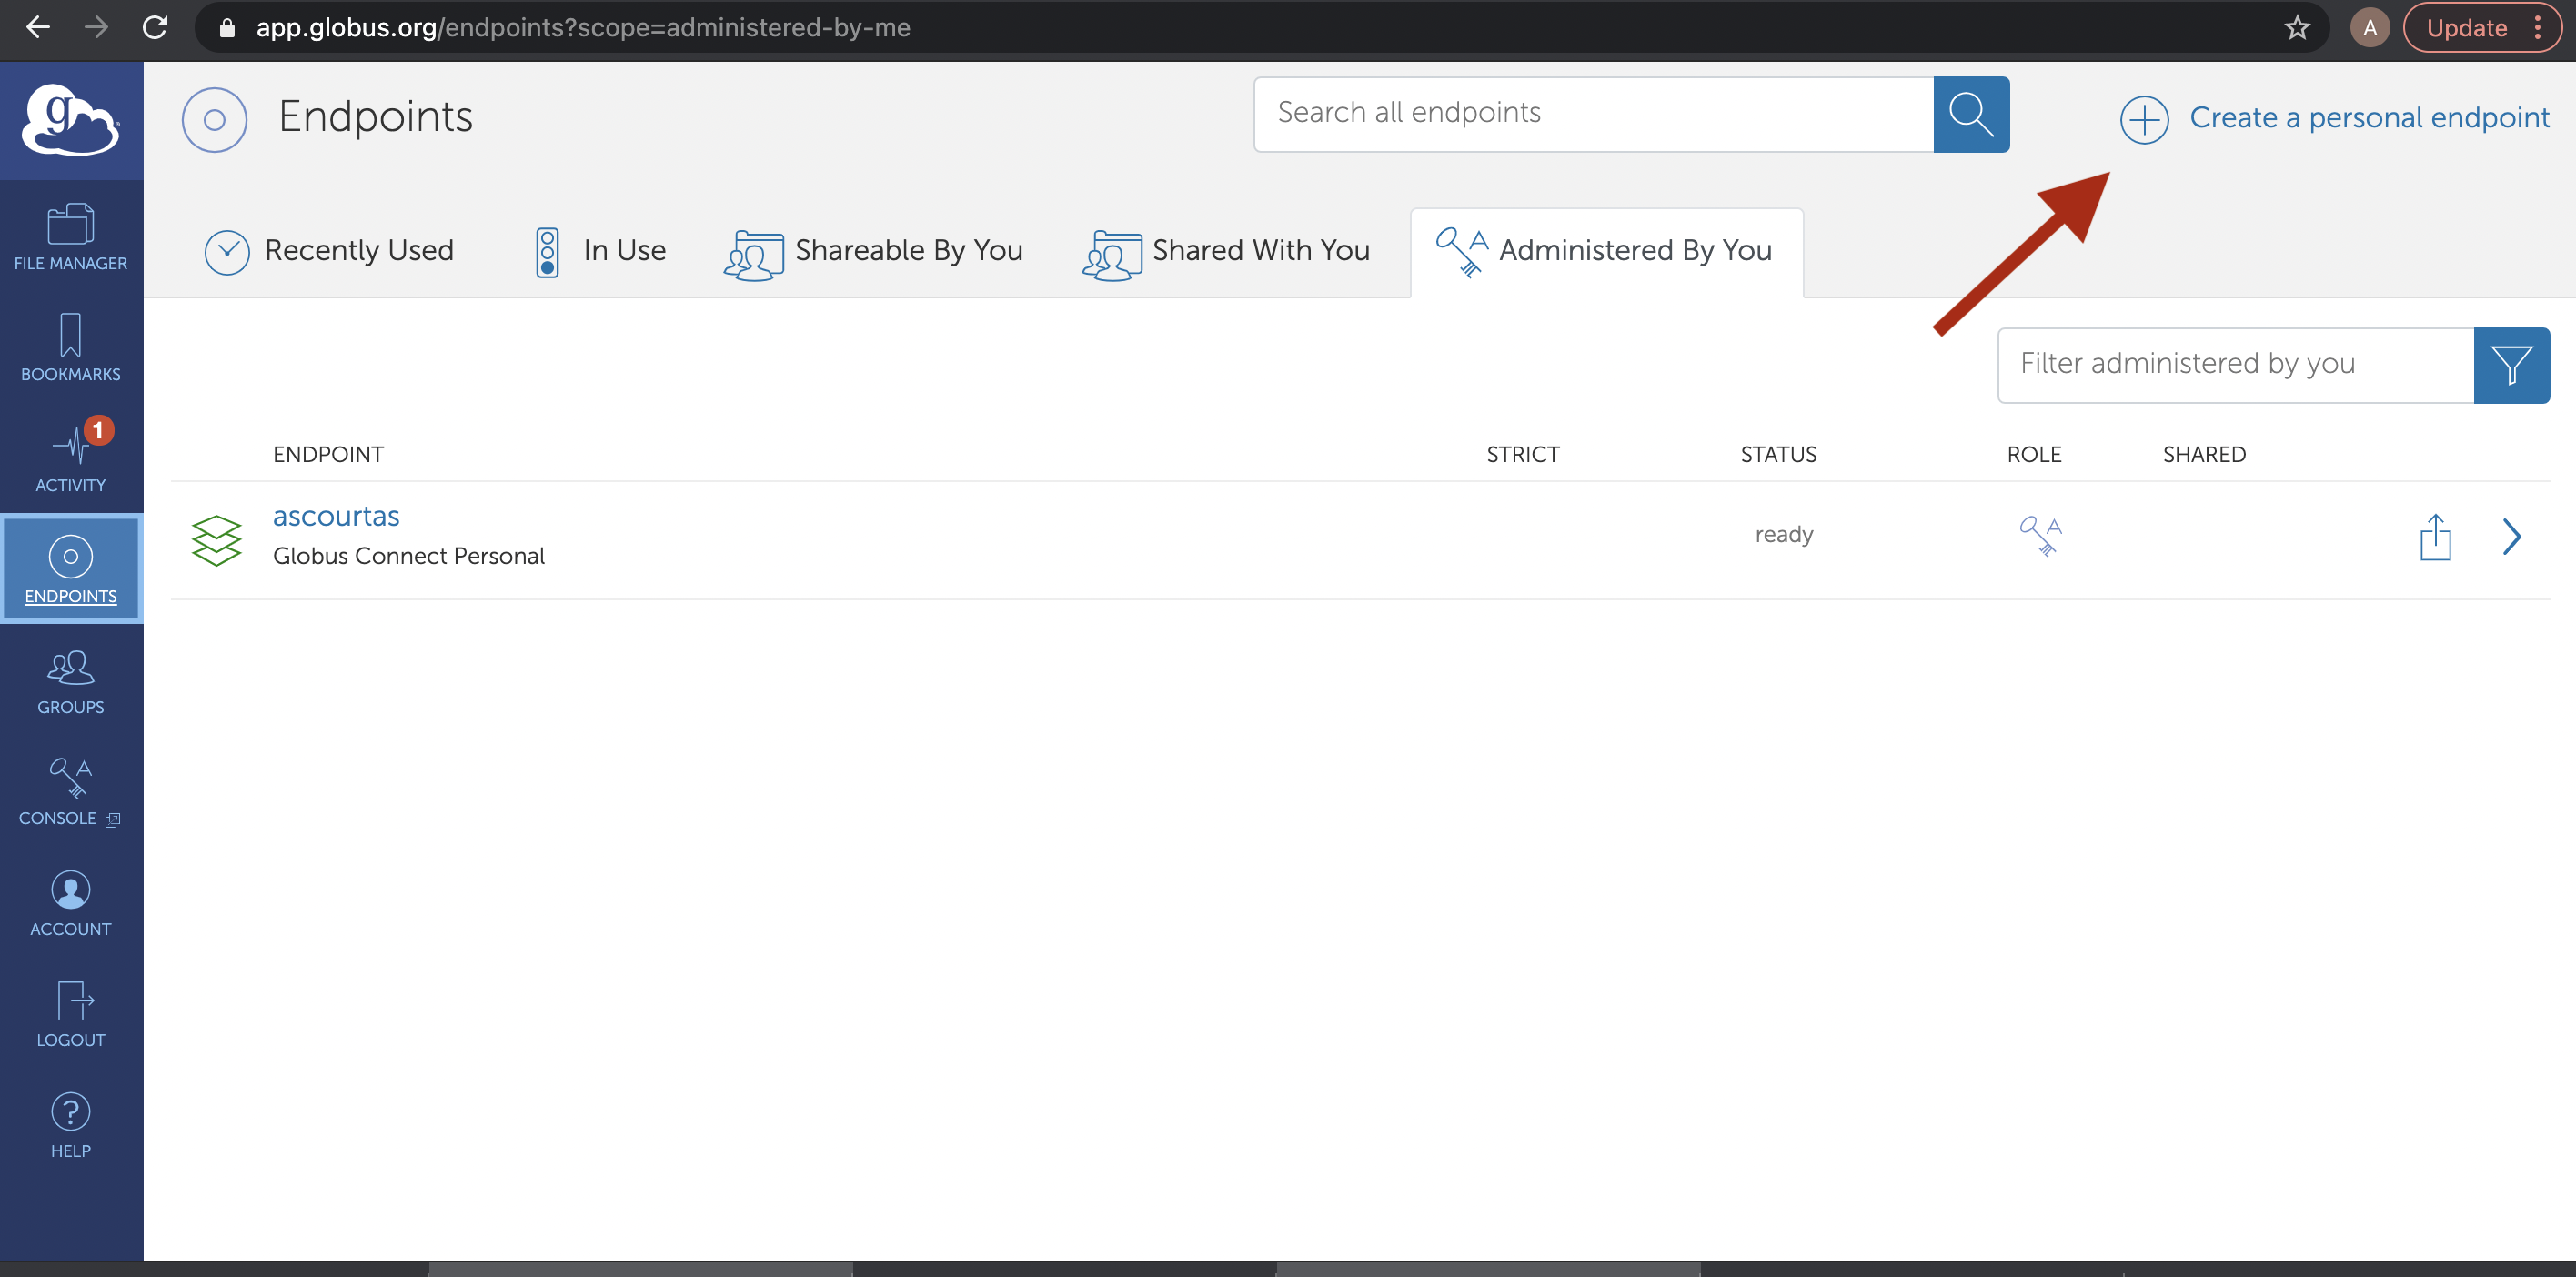

Follow the steps for downloading the Globus Connect Client on your machine.

Once downloaded, you can view your endpoint in the "Endpoints" section in the 
lefthand nav bar. Click on it to open the File Manager Overview.

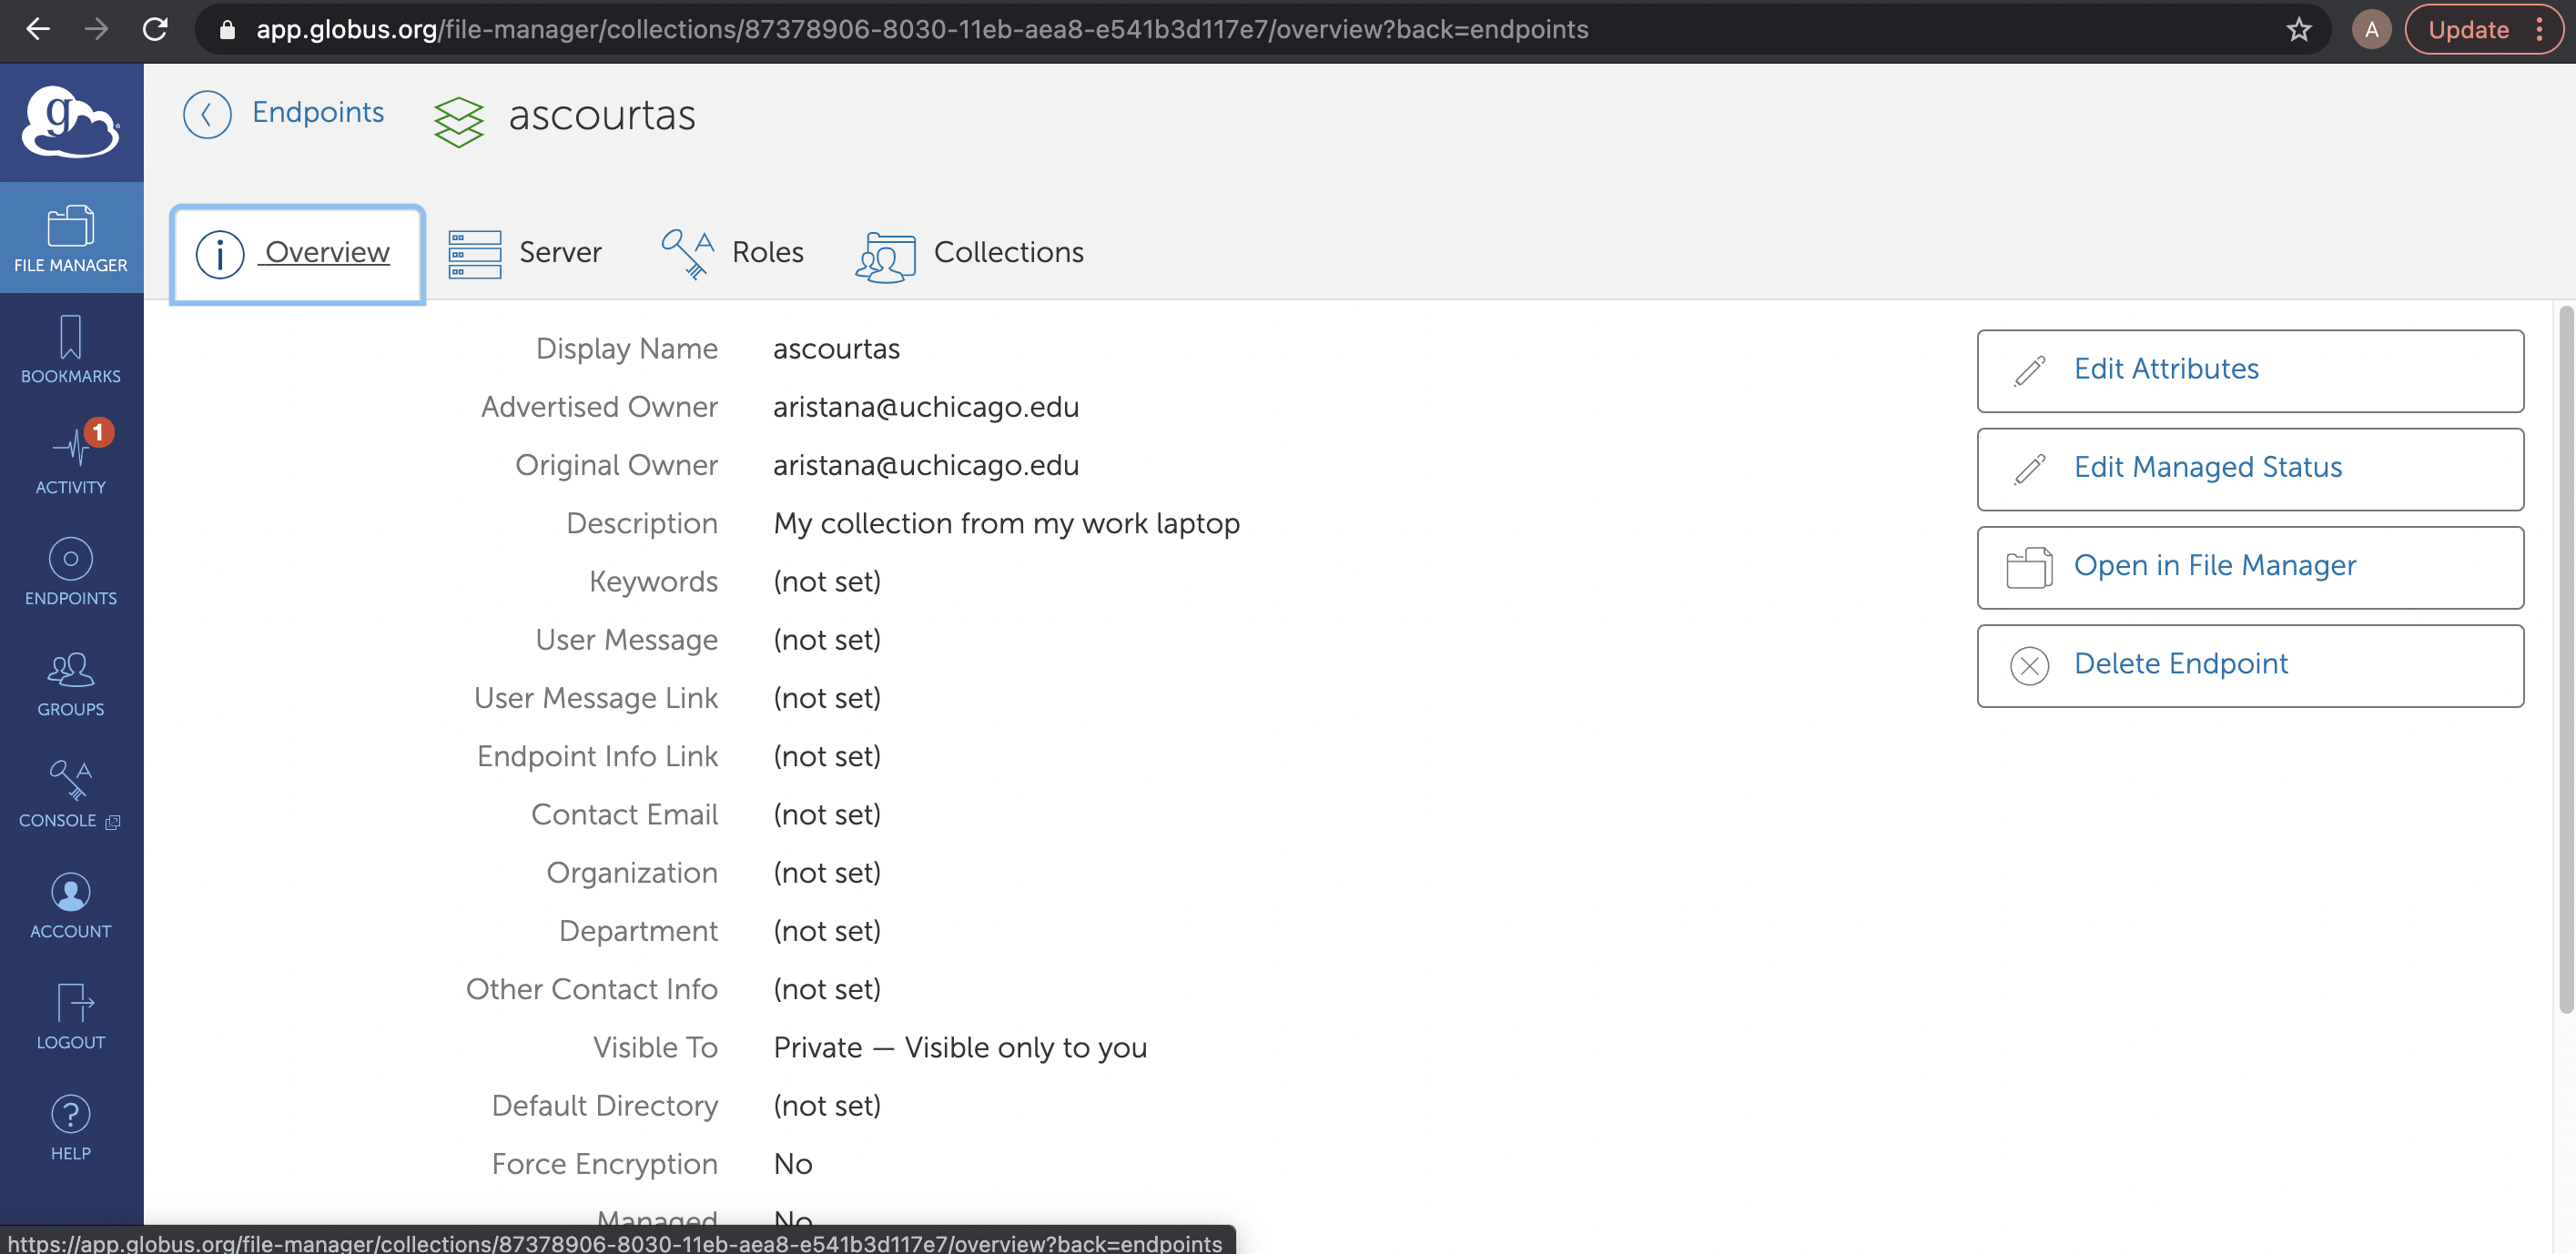

Click "Open in File Manager" to view the files on your endpoint

Navigate to the data package you want to publish. Click on it, and click "Get link" to copy the Globus endpoint URI. 

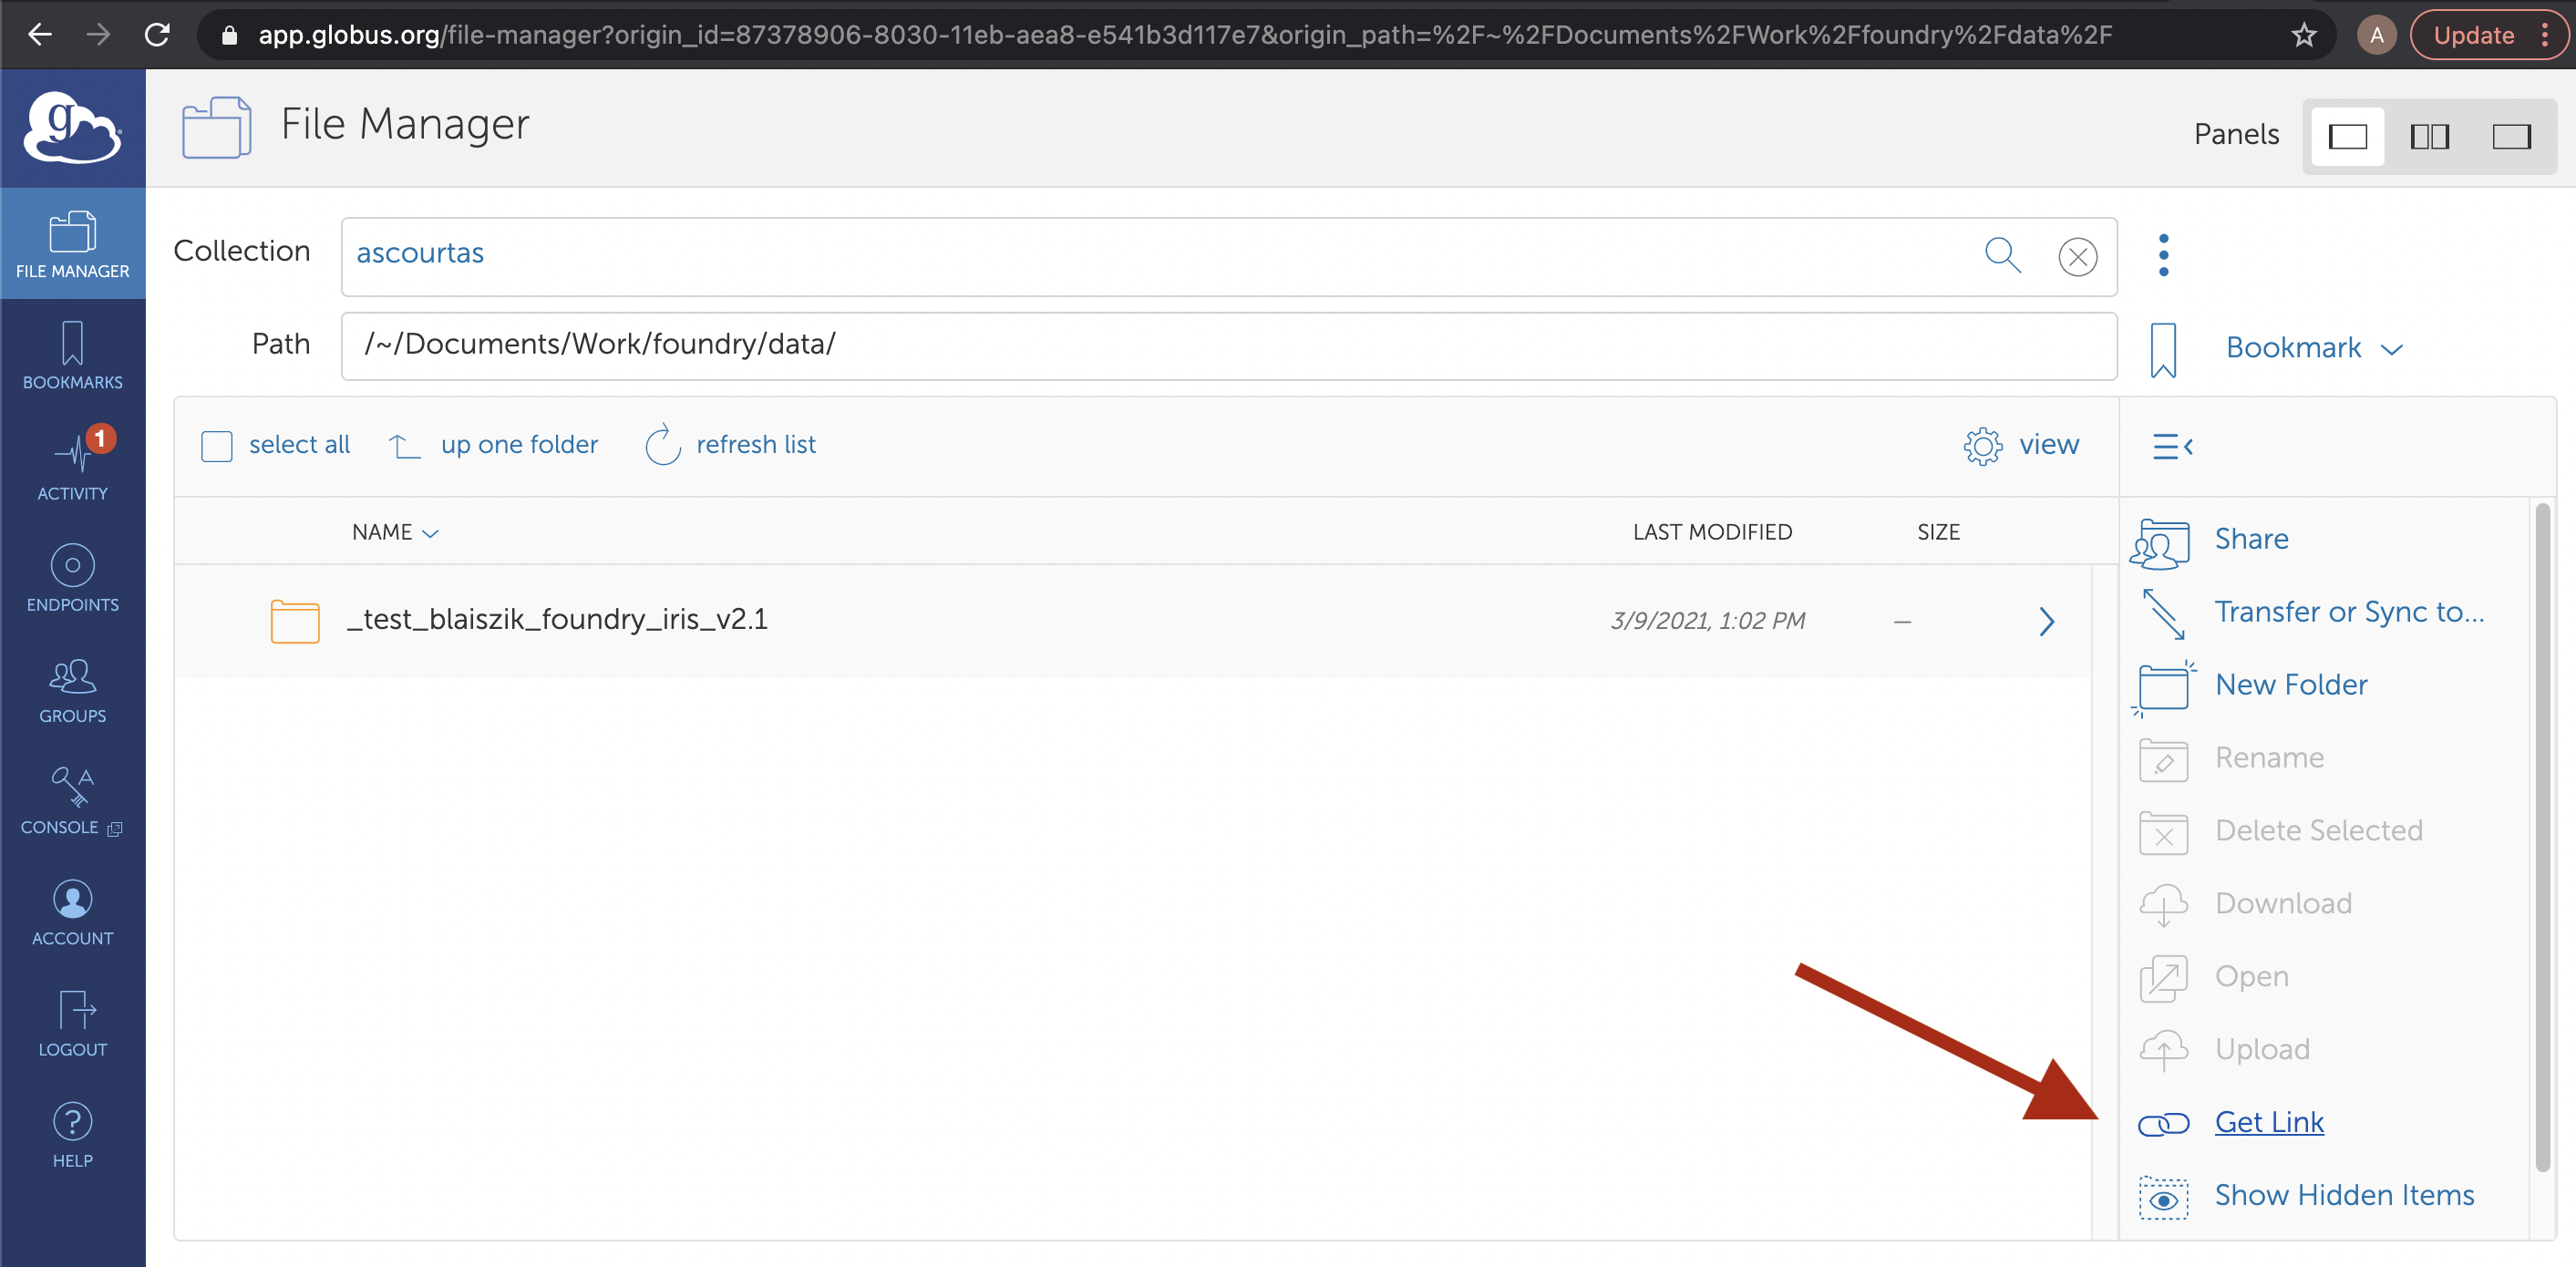

The Globus endpoint URI is how Foundry knows where to find your data package. This URI is what we will pass to our `publish()` function via `data_source`.

For example:

In [ ]:
# a Globus endpoint. In this example, I use a dataset on our temp
#   server. You can also make your local machine a Globus endpoint
data_source = "https://app.globus.org/file-manager?origin_id=e38ee745-6d04-11e5-ba46-22000b92c6ec&origin_path=%2Ffoundry-test%2Firis-dev%2F"

# publish to Foundry! returns a result object we can inspect
res = f.publish_dataset(example_iris_metadata, title, authors, globus_data_source=data_source, short_name=short_name)